# Algerian Forest Fire Lasso - Utkarsh Gaikwad

In [1]:
import pandas as pd
df = pd.read_csv('Cleaned_Algerian_Forest_Fire.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bej
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bej
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bej
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bej
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bej


In [2]:
# Drop day , month and year
df = df.drop(labels=['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bej
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Bej
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bej
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,Bej
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Bej


In [3]:
classes_mapper = {'fire':1, 'not fire':0}
df['Classes'] = df['Classes'].map(classes_mapper)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,Bej
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,Bej
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,Bej
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,Bej
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,Bej


In [4]:
# One Hot Encoding of region
df_reg = pd.get_dummies(df['Region'])
df_reg.head()

,Bej,SB Abs
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [5]:
df_new = pd.concat([df,df_reg],axis=1)
df_new = df_new.drop(labels=['Region'],axis=1)
df_new.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Bej,SB Abs
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1,0


## FWI is output feature

In [6]:
X = df_new.drop(labels='FWI',axis=1)
Y = df_new[['FWI']]

<AxesSubplot: >

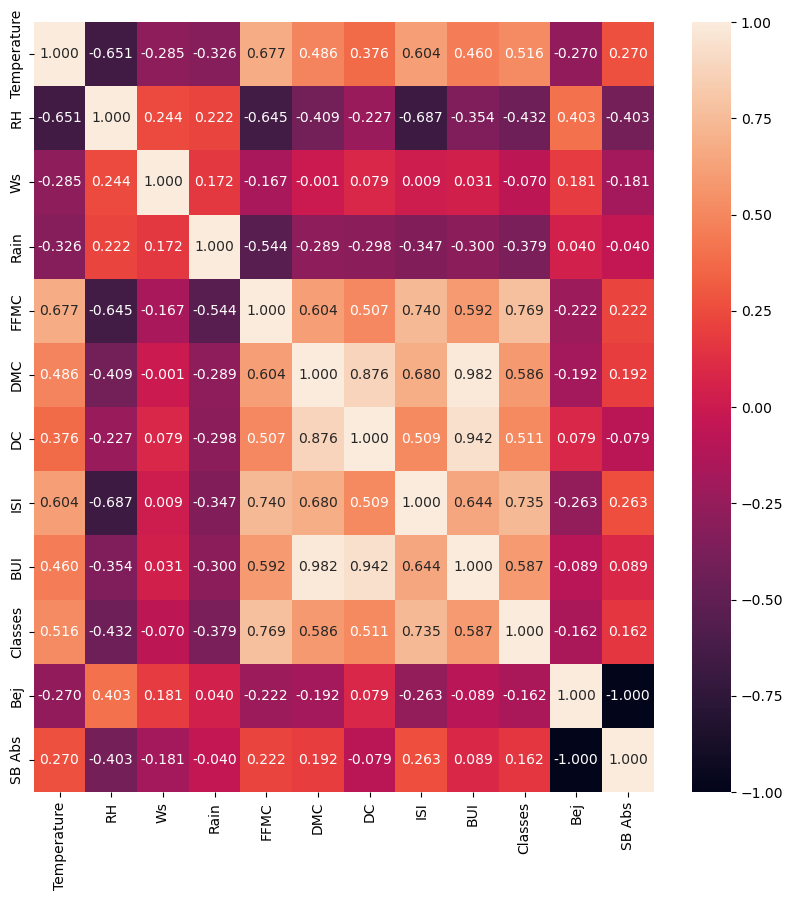

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,fmt='.3f')

## Removing Multicolinearity using VIF


In [8]:
# calculate VIF for each feature for Numerical features only
X_num = X.drop(labels=['Classes','Bej', 'SB Abs'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]
vif["feature"] = X_num.columns
vif = vif.sort_values(by='VIF',ascending=False)
vif = vif.reset_index(drop=True)
vif

,VIF,feature
0,373.972559,BUI
1,182.249643,DMC
2,97.507959,Temperature
3,94.690967,FFMC
4,50.834602,DC
5,34.761298,Ws
6,30.572285,RH
7,8.833535,ISI
8,1.651135,Rain


In [9]:
vif[vif.VIF>10]

,VIF,feature
0,373.972559,BUI
1,182.249643,DMC
2,97.507959,Temperature
3,94.690967,FFMC
4,50.834602,DC
5,34.761298,Ws
6,30.572285,RH


In [10]:
## Dropping BUI and DMC colunns
X = X.drop(labels=['BUI','DMC'],axis=1)

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.25, random_state=42)

In [12]:
xtrain.shape, ytrain.shape

((182, 10), (182, 1))

In [13]:
xtest.shape, ytest.shape

((61, 10), (61, 1))

## Standard Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [15]:
xtrain.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,Classes,Bej,SB Abs
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.362044,-0.629633,-1.104315,0.989071,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.862590,-0.930585,-1.104315,-1.011050,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,-0.070404,2.727139,0.905539,-1.011050,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.055926,-0.606483,-1.104315,0.989071,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.846043,-0.699084,-1.104315,0.989071,-0.989071


In [16]:
xtest.head()

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,Classes,Bej,SB Abs
0,-0.301758,0.115224,-0.219054,-0.384060,0.633218,0.291561,0.203772,0.905539,0.989071,-0.989071
1,0.239326,-0.552633,-0.978441,-0.384060,0.737981,-0.397207,0.365823,0.905539,0.989071,-0.989071
2,-1.113385,-0.285490,0.920027,0.645242,-0.973140,-0.852248,-0.837985,-1.104315,-1.011050,1.011050
3,0.509868,-0.285490,-0.978441,-0.290487,0.130358,0.792106,-0.629633,-1.104315,-1.011050,1.011050
4,-0.572300,0.182009,-0.598748,-0.384060,0.542424,-0.107635,-0.074030,0.905539,-1.011050,1.011050


In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [18]:
regressor.coef_

array([[-9.05723922e-02,  3.38866602e-03, -2.31561699e-01,
         2.16443842e-01, -6.73407574e-01,  3.06573810e+00,
         5.89461050e+00,  1.70813383e-01, -1.62901036e-01,
         1.62901036e-01]])

In [19]:
regressor.intercept_

array([7.15604396])

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(x,y,model):
    y_pred = model.predict(x)
    mae = mean_absolute_error(y,y_pred)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y,y_pred)
    return mae, mse, r2

In [21]:
def print_evaluated_results(xtrain,ytrain,xtest,ytest,model):
    try:
       # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(xtrain, ytrain,model)
        model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(xtest,ytest, model)

        # Printing results
        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
    
        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
    
    except Exception as e:
        print(f'Exception occured : {e}')

In [22]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,regressor)

Model performance for Training set
- Root Mean Squared Error: 2.7709
- Mean Absolute Error: 0.9198
- R2 Score: 0.9528
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4285
- Mean Absolute Error: 0.7749
- R2 Score: 0.9677


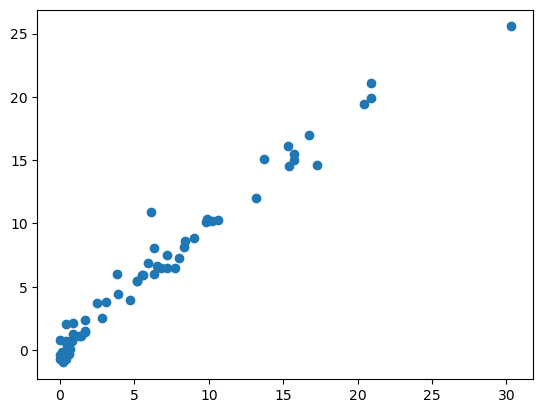

In [23]:
import seaborn as sns
ytest_pred = regressor.predict(xtest)
plt.scatter(ytest, ytest_pred)
plt.show()

# Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(xtrain,ytrain)

Lasso()

In [25]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,lasso)

Model performance for Training set
- Root Mean Squared Error: 4.4321
- Mean Absolute Error: 1.3586
- R2 Score: 0.9245
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2.9415
- Mean Absolute Error: 1.1442
- R2 Score: 0.9335


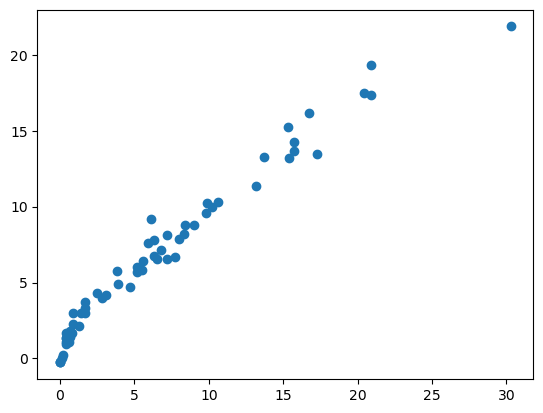

In [26]:
ytest_pred_lasso = lasso.predict(xtest)
plt.scatter(ytest,ytest_pred_lasso)
plt.show()

In [27]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv = lassocv.fit(xtrain,ytrain.values.flatten())

In [28]:
lassocv.alpha_

0.06139149443725234

In [29]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [30]:
print_evaluated_results(xtrain,ytrain,xtest,ytest, lassocv)

Model performance for Training set
- Root Mean Squared Error: 2.8417
- Mean Absolute Error: 0.9424
- R2 Score: 0.9516
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4794
- Mean Absolute Error: 0.7661
- R2 Score: 0.9666


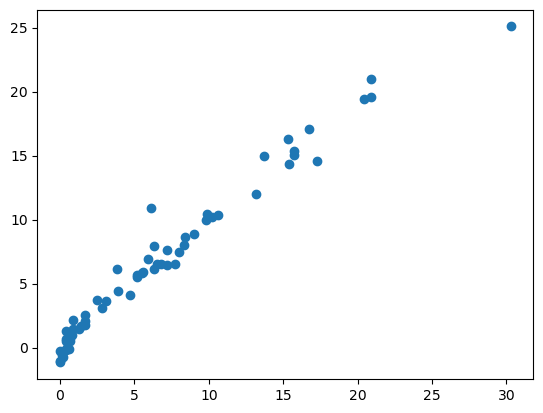

In [31]:
ytest_pred_lassocv = lassocv.predict(xtest)
plt.scatter(ytest,ytest_pred_lassocv)
plt.show()

## Ridge

In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(xtrain,ytrain)

Ridge()

In [33]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,ridge)

Model performance for Training set
- Root Mean Squared Error: 2.7752
- Mean Absolute Error: 0.9244
- R2 Score: 0.9527
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4548
- Mean Absolute Error: 0.7771
- R2 Score: 0.9671


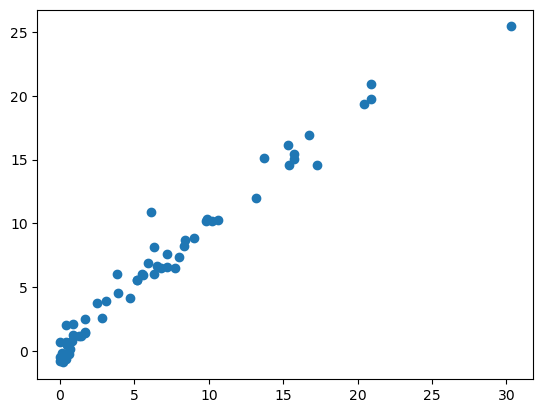

In [34]:
ytest_pred_ridge = ridge.predict(xtest)
plt.scatter(ytest,ytest_pred_ridge)

## Ridge CV

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(xtrain,ytrain)

RidgeCV(cv=5)

In [36]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,ridgecv)

Model performance for Training set
- Root Mean Squared Error: 2.7752
- Mean Absolute Error: 0.9244
- R2 Score: 0.9527
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.4548
- Mean Absolute Error: 0.7771
- R2 Score: 0.9671


In [37]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

## Elastic Net

In [38]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(xtrain,ytrain)

ElasticNet()

In [39]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,elastic)

Model performance for Training set
- Root Mean Squared Error: 8.1807
- Mean Absolute Error: 2.0357
- R2 Score: 0.8607
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.8435
- Mean Absolute Error: 2.0322
- R2 Score: 0.8454


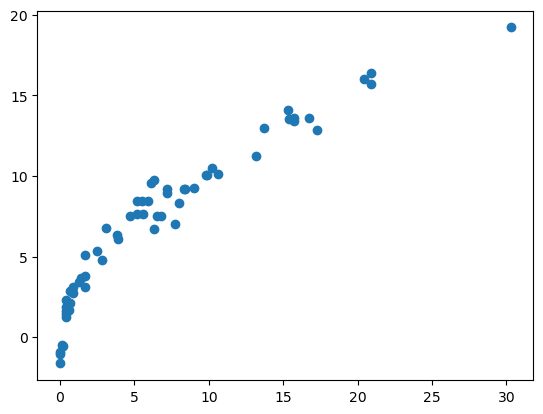

In [40]:
ytest_pred_elastic = elastic.predict(xtest)
plt.scatter(ytest,ytest_pred_elastic)

## Elastic Net CV

In [41]:
from sklearn.linear_model import ElasticNetCV
elcv = ElasticNetCV(cv=5)
elcv.fit(xtrain,ytrain.values.flatten())

ElasticNetCV(cv=5)

In [42]:
print_evaluated_results(xtrain,ytrain,xtest,ytest,elcv)

Model performance for Training set
- Root Mean Squared Error: 2.8446
- Mean Absolute Error: 0.9599
- R2 Score: 0.9516
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5625
- Mean Absolute Error: 0.7938
- R2 Score: 0.9647


In [43]:
elcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [44]:
models = [regressor, lasso, lassocv, ridge, ridgecv, elastic, elcv]
model_name = ['Linear','lasso','lassocv','ridge','ridgecv','elastic net', 'elasticnetcv']
mae_list = []
mse_list = []
r2_list = []
for model in models:
    mae, mse, r2 = evaluate_model(xtest,ytest,model)
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

In [45]:
dct = {'model name':model_name,'Test MAE':mae_list,'Test MSE':mse_list,'Test_r2':r2_list}
df_compare = pd.DataFrame(dct)
df_compare

,model name,Test MAE,Test MSE,Test_r2
0,Linear,0.774850,1.428507,0.967725
1,lasso,1.144237,2.941504,0.933541
2,lassocv,0.766106,1.479425,0.966575
3,ridge,0.777110,1.454773,0.967132
4,ridgecv,0.777110,1.454773,0.967132
5,elastic net,2.032156,6.843451,0.845383
6,elasticnetcv,0.793818,1.562504,0.964698


In [46]:
df_compare.sort_values(by='Test_r2',ascending=False)

,model name,Test MAE,Test MSE,Test_r2
0,Linear,0.774850,1.428507,0.967725
3,ridge,0.777110,1.454773,0.967132
4,ridgecv,0.777110,1.454773,0.967132
2,lassocv,0.766106,1.479425,0.966575
6,elasticnetcv,0.793818,1.562504,0.964698
1,lasso,1.144237,2.941504,0.933541
5,elastic net,2.032156,6.843451,0.845383


## Pickling the best model

In [52]:
import pickle
with open('LinearReg.pkl','wb') as file:
    pickle.dump(regressor, file)

## Pickling the standard scaler

In [53]:
with open('scaler.pkl','wb') as file2:
    pickle.dump(scaler,file2)